# Data cleaning and understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshatshaw7/cardiovascular-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 998k/998k [00:00<00:00, 33.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akshatshaw7/cardiovascular-disease-dataset/versions/1


In [3]:
df = pd.read_csv(path + "/health_data.csv")
df

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993.0,19240.0,1,168.0,76.0,120.0,80.0,0,0,1,0,1,0
69996,69996,99995.0,22601.0,0,158.0,126.0,140.0,90.0,1,1,0,0,1,1
69997,69997,99996.0,19066.0,1,183.0,105.0,180.0,90.0,2,0,0,1,0,1
69998,69998,99998.0,22431.0,0,163.0,72.0,135.0,80.0,0,1,0,0,0,1


In [4]:
# we can get random 30000 examples because of fast computation
# df = df1.sample(n=30000, random_state=42)

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
# Dropping unnecessary index columns
df.drop(["Unnamed: 0"], axis = 1, inplace = True)
df.drop(["id"], axis = 1, inplace = True)

In [7]:
df.dtypes # there are no categorical values

,0
age,float64
gender,int64
height,float64
weight,float64
ap_hi,float64
ap_lo,float64
cholesterol,int64
gluc,int64
smoke,int64
alco,int64


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,0.349571,0.476838,0.0,0.0,0.0,1.0,1.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,0.366871,0.680250,0.0,0.0,0.0,1.0,2.0
gluc,70000.0,0.226457,0.572270,0.0,0.0,0.0,0.0,2.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [9]:
df.corr(numeric_only=True)['cardio']

,cardio
age,0.238159
gender,0.008109
height,-0.010821
weight,0.181660
ap_hi,0.054475
ap_lo,0.065719
cholesterol,0.221147
gluc,0.089307
smoke,-0.015486
alco,-0.007330


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

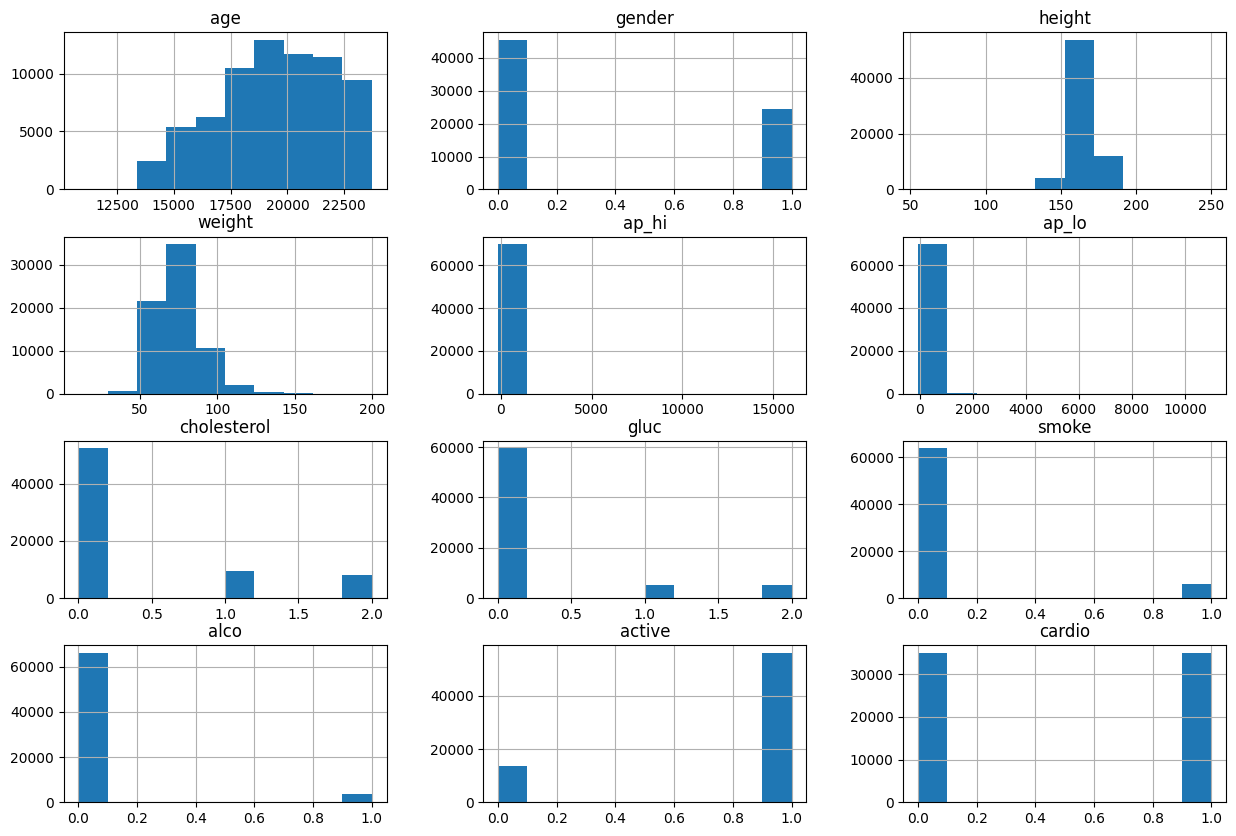

In [10]:
df.hist(figsize=(15,10))

In [11]:
for col in df.columns:
    print(col, df[col].value_counts())

age age
19741.0    32
18236.0    32
20376.0    31
18253.0    31
20442.0    31
           ..
19277.0     1
16493.0     1
20059.0     1
23659.0     1
17926.0     1
Name: count, Length: 8076, dtype: int64
gender gender
0    45530
1    24470
Name: count, dtype: int64
height height
165.0    5853
160.0    5022
170.0    4679
168.0    4399
164.0    3396
         ... 
112.0       1
98.0        1
74.0        1
119.0       1
57.0        1
Name: count, Length: 109, dtype: int64
weight weight
65.0    3850
70.0    3764
68.0    2831
75.0    2740
60.0    2710
        ... 
92.2       1
75.6       1
82.9       1
23.0       1
99.9       1
Name: count, Length: 287, dtype: int64
ap_hi ap_hi
 120.0     27699
 140.0      9506
 130.0      8961
 110.0      8644
 150.0      4450
           ...  
 1620.0        1
 199.0         1
-150.0         1
-115.0         1
 2000.0        1
Name: count, Length: 153, dtype: int64
ap_lo ap_lo
80.0     34847
90.0     14316
70.0     10245
100.0     4082
60.0      2727
        

In [12]:
# there are no null values
df.isna().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


In [13]:
df['age'].max() # as we see age column is given with values of days, so it would be better to change it to actual years.

23713.0

In [14]:
df['age'] = round(df['age']/365,0)
df['age'] = df['age'].astype(int)
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,55,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,52,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,48,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,48,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0
5,60,0,151.0,67.0,120.0,80.0,1,1,0,0,0,0
6,61,0,157.0,93.0,130.0,80.0,2,0,0,0,1,0
7,62,1,178.0,95.0,130.0,90.0,2,2,0,0,1,1
8,48,0,158.0,71.0,110.0,70.0,0,0,0,0,1,0
9,54,0,164.0,68.0,110.0,60.0,0,0,0,0,0,0


In [15]:
df = df[df['ap_hi'] <= 300]
df = df[df['ap_lo'] <= 300]
df = df[df['height'] >= 130]
df = df[df['weight'] >= 30]

In [16]:
df.dtypes

,0
age,int64
gender,int64
height,float64
weight,float64
ap_hi,float64
ap_lo,float64
cholesterol,int64
gluc,int64
smoke,int64
alco,int64


Dropping duplicate values

In [17]:
# checking the duplicate rows first
duplicate_rows = df[df.duplicated(keep='first')]
duplicate_rows

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
842,41,1,165.0,60.0,120.0,80.0,0,0,0,0,0,0
861,54,0,165.0,68.0,120.0,80.0,0,0,0,0,1,0
1118,44,0,170.0,65.0,120.0,80.0,0,0,0,0,1,0
1406,50,1,163.0,70.0,120.0,80.0,0,0,0,0,1,0
1898,58,0,160.0,58.0,120.0,80.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69927,53,1,175.0,80.0,120.0,80.0,0,0,0,0,1,1
69951,42,0,158.0,55.0,110.0,70.0,0,0,0,0,1,0
69983,54,0,165.0,72.0,120.0,80.0,0,0,0,0,1,0
69986,50,1,180.0,78.0,120.0,80.0,0,0,0,0,1,0


In [18]:
df = df.drop_duplicates(keep='first')
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,55,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,52,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,48,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,48,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,1,168.0,76.0,120.0,80.0,0,0,1,0,1,0
69996,62,0,158.0,126.0,140.0,90.0,1,1,0,0,1,1
69997,52,1,183.0,105.0,180.0,90.0,2,0,0,1,0,1
69998,61,0,163.0,72.0,135.0,80.0,0,1,0,0,0,1


In [19]:
df['active'].value_counts()

,count
active,
1,51889
0,13206


In [20]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# Train-test-split and building the model

In [21]:
X = df.drop(['cardio'], axis=1)
y = df['cardio']

In [22]:
X.shape, y.shape

((65095, 11), (65095,))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29) # add "stratify = y" to seperate target values

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52076, 11), (13019, 11), (52076,), (13019,))

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer # although we don't need imputer for current df we need to create model for new data that can have null values or categorical values
from sklearn.compose import ColumnTransformer
num_cols = X_train.select_dtypes(include=np.number).columns

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])

preprocessing = ColumnTransformer([
                        ('num', num_pipeline, num_cols),
                    ], remainder='passthrough')

In [27]:
X_train_prepared = pd.DataFrame(preprocessing.fit_transform(X_train), columns = preprocessing.get_feature_names_out())
X_test_prepared = pd.DataFrame(preprocessing.transform(X_test), columns = preprocessing.get_feature_names_out())

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_prepared, y_train)


LogisticRegression()

In [29]:
y_pred = lr.predict(X_test_prepared)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7244027959136646


In [31]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      6408
           1       0.74      0.70      0.72      6611

    accuracy                           0.72     13019
   macro avg       0.73      0.72      0.72     13019
weighted avg       0.73      0.72      0.72     13019



# Finding the best threshold value

In [33]:
y_probs = lr.predict_proba(X_test_prepared)[:, 1]

In [34]:
import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Youden's J statistic
j_scores = tpr - fpr

optimal_threshold = thresholds[np.argmax(j_scores)]
print("Optimal Threshold (Youden's J):", optimal_threshold)

Optimal Threshold (Youden's J): 0.49684248894740396


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_scores = []
for threshold in thresholds:
    y_pred_custom = (y_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    f1_scores.append(f1)

optimal_threshold = thresholds[np.argmax(f1_scores)]
print("Optimal Threshold (F1-Score):", optimal_threshold)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Optimal Threshold (F1-Score): 0.4038460831944134


# Fine-tuning hyperparameters

In [42]:
y_probs = lr.predict_proba(X_test_prepared)[:, 1]

In [43]:
threshold = 0.40  # this value is found in "Finding the best threshold value" section and now I check if it works
y_pred_custom = (y_probs >= threshold).astype(int)
classification_rep = classification_report(y_test, y_pred_custom)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.58      0.66      6408
           1       0.67      0.83      0.74      6611

    accuracy                           0.70     13019
   macro avg       0.72      0.70      0.70     13019
weighted avg       0.72      0.70      0.70     13019



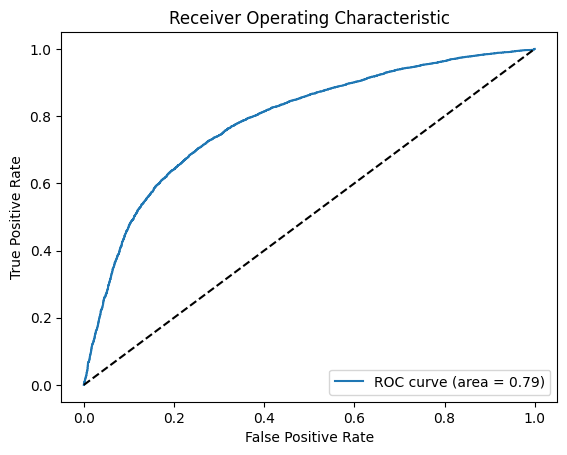

In [38]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score

param_dist = {
    'C': uniform(0.001, 10),
    'penalty': ['l1', 'l2'],
    'solver': [ 'liblinear', 'saga'],
    'max_iter': randint(100, 1000)
              }

random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_prepared, y_train)
y_pred = random_search.predict(X_test_prepared)


accuracy = accuracy_score(y_test, y_pred)

print('Best hyperparameters:', random_search.best_params_)
print('Test accuracy:', accuracy)

Best hyperparameters: {'C': 9.386527090157502, 'max_iter': 485, 'penalty': 'l2', 'solver': 'saga'}
Test accuracy: 0.7244796067286274


In [44]:
# I check if the above-mentioned best hyperparameters improve model accuracy
lr_tuned = LogisticRegression(C=9.38, solver = 'saga', penalty = 'l2', max_iter = 485)
lr_tuned.fit(X_train_prepared, y_train)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      6408
           1       0.74      0.70      0.72      6611

    accuracy                           0.72     13019
   macro avg       0.73      0.72      0.72     13019
weighted avg       0.73      0.72      0.72     13019



We see that there is not much difference between tuned version and version with default values

# Creating a predictive system

In [58]:
X.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

In [41]:
feature_names = preprocessing.get_feature_names_out()

input_data = (62,0,162.0,58.0,130.0,90.0,0,0,0,0,0) # numbers are just example

input_df = pd.DataFrame([input_data], columns=X_train.columns)

input_data_prepared = preprocessing.transform(input_df)

input_data_prepared = pd.DataFrame(input_data_prepared, columns=feature_names)

prediction = lr.predict(input_data_prepared)

if (prediction[0] == 0):
    print("The person does not have a heart disease")
else:
    print("The person has a heart disease")

The person has a heart disease


# Experimental part

XGBClassifier

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_prepared, y_train)
xgb.score(X_test_prepared, y_test)

0.7308549043705354

RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_prepared, y_train)
rf.score(X_test_prepared, y_test)

0.6898379291804286

DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_prepared, y_train)
dt.score(X_test_prepared, y_test)

0.6122590060680544

We see that even this complex models doesn't return perfect accuracy.